LOADING REQUIRED LIBRARIES

In [1]:
import pandas as pd

CLEANING AND PROCESSING THE DATA

In [3]:
apps_df = pd.read_csv(r'E:\Android App Market on Google Play\datasets\apps.csv')
reviews_df = pd.read_csv(r'E:\Android App Market on Google Play\datasets\user_reviews.csv')

In [4]:
print(apps_df.head())

   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  J

In [5]:
print(reviews_df.head())

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


APP DATASET CLEANING

In [6]:
apps_df.drop_duplicates(inplace=True)
apps_df.dropna(inplace=True)

In [8]:
apps_df['Installs'] = apps_df['Installs'].str.replace('[+,]', '', regex=True).astype(int)


USER REVIEWING DATASET

In [9]:
reviews_df.drop_duplicates(inplace=True)
reviews_df.dropna(subset=['Translated_Review'], inplace=True)

In [10]:
print(reviews_df.head())

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
5  Positive                1.00                0.300000  


MERGING TWO DATASET

In [11]:
merged_df = pd.merge(apps_df, reviews_df, on='App')

print(merged_df.head())

   Unnamed: 0                  App        Category  Rating  Reviews  Size  \
0           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
1           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
2           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
3           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
4           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   

   Installs  Type Price Content Rating                     Genres  \
0    500000  Free     0       Everyone  Art & Design;Pretend Play   
1    500000  Free     0       Everyone  Art & Design;Pretend Play   
2    500000  Free     0       Everyone  Art & Design;Pretend Play   
3    500000  Free     0       Everyone  Art & Design;Pretend Play   
4    500000  Free     0       Everyone  Art & Design;Pretend Play   

       Last Updated Current Ver   Android Ver  \
0  January 15, 2018       2.0.0  4.0.3 and up   
1  January 15, 2018     

SENTIMENT ANALYSIS ON USER REVIEWS

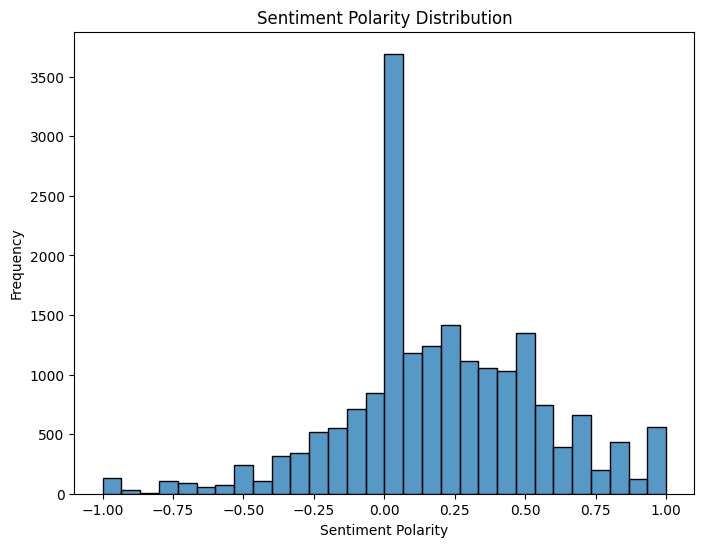

In [12]:
from textblob import TextBlob

merged_df['Sentiment'] = merged_df['Translated_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(merged_df['Sentiment'], bins=30)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

ANALYSIS AND VISUALIZATIONS

CATEGORY-WISE APP DISTRIBUTION

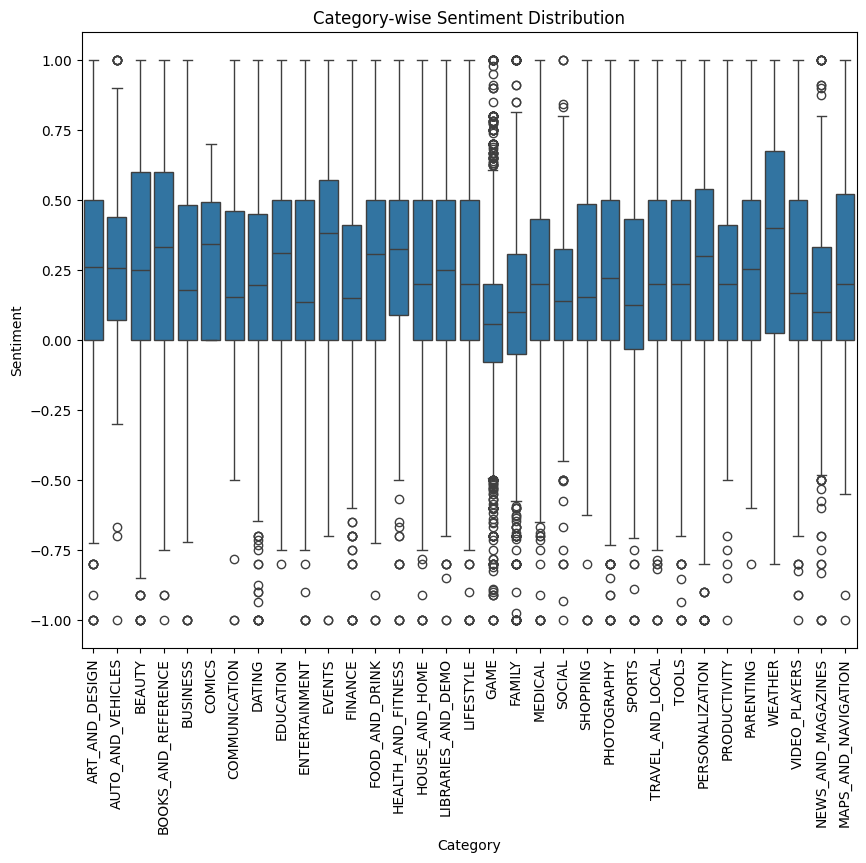

In [13]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Category', y='Sentiment', data=merged_df)
plt.xticks(rotation=90)
plt.title('Category-wise Sentiment Distribution')
plt.show()

RATING VS SENTIMENT

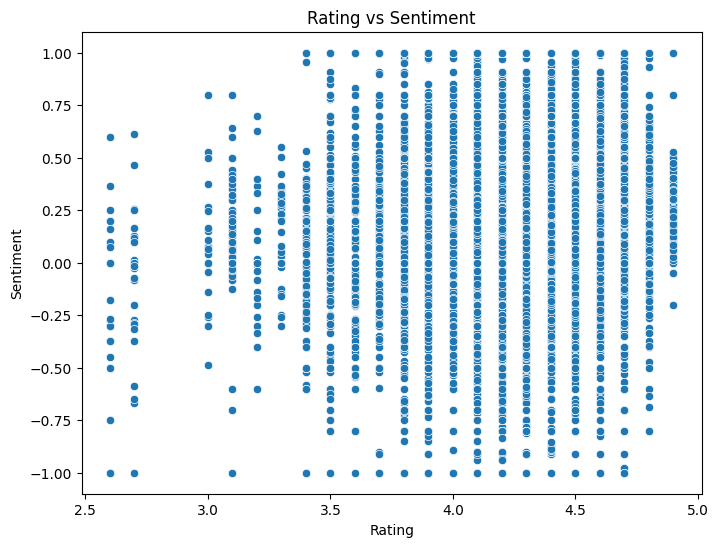

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Sentiment', data=merged_df)
plt.title('Rating vs Sentiment')
plt.xlabel('Rating')
plt.ylabel('Sentiment')
plt.show()